In [5]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [8]:
from divers import plot_confusion_matrix

In [9]:
import sys
sys.path.append('./sompyLatmos/')     # Chemin du package
from sompy import SOMFactory
from sompy import SOMData

**graine aléatoire** (Pour assurer la reproductivié de l'expérience)

In [10]:
#seed = 0 
#np.random.seed(seed)

### Chargement et mise en forme des données

In [11]:
#from lettresZEtF import splitNlabs,  
from lettresZEtF import Zcreadata, Fcreadata
from lettresZEtF import lettreplot

**Choix de la répartition et du nombre de données** 

In [12]:
N  = 500; # Taille des donnees
#strChoixDeLaForme = 'F'
strChoixDeLaForme = 'Z'

#### Creation du jeu de donnees d'apprentissage et de leurs structures

In [13]:
if strChoixDeLaForme == 'Z':
    classnames = ['T','B','D'];
    # 'T' correspond à la bar du haut comme Top,
    # 'B', à celle du bas comme Bottom et
    # 'D' à la Diagonale
    data, data_labels, comp_names = Zcreadata(N,
                                   classnames=classnames)
elif strChoixDeLaForme == 'F':
    classnames = ['T','M','L'];
    # 'T' correspond à la bar du haut 
    # 'M', à celle du Milieu et
    # 'L' à la bar gauche, comme Left
    data, data_labels, comp_names = Fcreadata(N, 
                                   classnames=classnames)
masque = np.ones(data.shape[1])

#### Affichage des données

In [14]:
plt.figure(figsize=(8,8))
lettreplot(data)
plt.grid()
plt.axis('equal') ;

**Création d'un objet sData**

In [15]:
import SimpSOM as sps
net = sps.somNet(40, 40, data, PBC=True, PCI=True)

Periodic Boundary Conditions active.
The weights will be initialised with PCA.


In [19]:


#We build a 40x40 network and initialise its weights with PCA 
net = sps.somNet(10, 1, data, PBC=True, PCI=True)

#Now we can train it with 0.1 learning rate for 10000 epochs
net.train(0.1, 10000)

#We print to screen the map of the weights differences between nodes, this will help us identify cluster centers 
net.diff_graph(show=True,printout=True)



Periodic Boundary Conditions active.
The weights will be initialised with PCA.
Training SOM... done!       


<Figure size 432x288 with 0 Axes>

In [14]:
sData = SOMData(data,      # les données 
                comp_names,# les noms des variables
                data_labels,# les potentielles étiquettes 
                normalization = "var")

**Affichage des T-SNE**

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.021s...
[t-SNE] Computed neighbors for 500 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.132751
[t-SNE] Computed conditional probabilities in 0.134s
[t-SNE] Iteration 50: error = 60.3084869, gradient norm = 0.5197192 (50 iterations in 0.104s)
[t-SNE] Iteration 100: error = 58.9092331, gradient norm = 0.4991696 (50 iterations in 0.099s)
[t-SNE] Iteration 150: error = 57.4400101, gradient norm = 0.5082474 (50 iterations in 0.094s)
[t-SNE] Iteration 200: error = 56.8809509, gradient norm = 0.5065166 (50 iterations in 0.114s)
[t-SNE] Iteration 250: error = 56.0107803, gradient norm = 0.5156711 (50 iterations in 0.095s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.010780
[t-SNE] Iteration 300: error = 0.5440220, gradient norm = 0.0017432 (50 iterations in 0.111s)
[t-SNE] Iteration 350: error = 0.4109727, gradient norm = 0.0006070 (

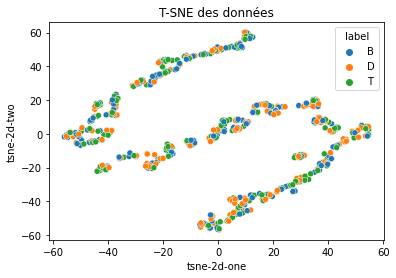

In [15]:
sData.plot_tsne()

### Création de la carte et apprentissage

#### Création d'une carte topologique (objet sm)

In [16]:
mapsize=(1,20) 
#mapsize=(1,10) 
#mapsize=(7,7) 

#mapsize=(3,7)   # a changer -> [nombre de lignes, nombre de colonnes]
sm = SOMFactory().build(sData, 
                        mapsize=mapsize,
                        normalization = None, 
                        initialization='pca', 
                        #initialization='random', 
                        neighborhood ='gaussian',
                        #neighborhood ='bubble',
                        radius_train ='linear', 
                        #radius_train ='power_series', 
                        #radius_train ='inverse_of_time', 
                        name='une lettre',
                        #lattice='rect',
                        lattice='hexa',
                        mask=masque,
                        components_to_plot=((0,1),))

#### Entraînement de la carte

Training ...
 Rough training...
radius_ini: 3.000 , radius_final: 1.000, trainlen: 4

Epoch : 0 qErr : 0.5269  tErr : 0.0040


Epoch : 1 qErr : 0.4364  tErr : 0.0200


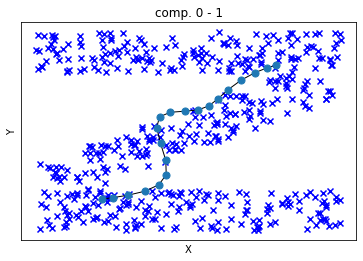

Epoch : 2 qErr : 0.2779  tErr : 0.0460


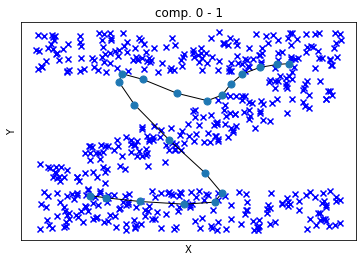

Epoch : 3 qErr : 0.2039  tErr : 0.0780


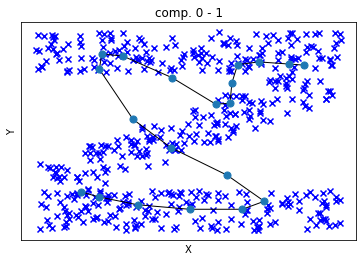

Finetune training
radius_ini: 1.250 , radius_final: 0.200, trainlen: 20

Epoch : 0 qErr : 0.2204  tErr : 0.0620


Epoch : 1 qErr : 0.2150  tErr : 0.0580


Epoch : 2 qErr : 0.2081  tErr : 0.0540


Epoch : 3 qErr : 0.2030  tErr : 0.0540


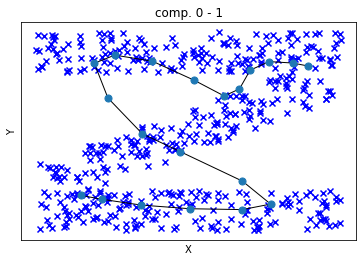

Epoch : 4 qErr : 0.1977  tErr : 0.0500


Epoch : 5 qErr : 0.1923  tErr : 0.0460


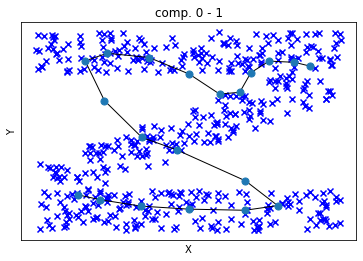

Epoch : 6 qErr : 0.1865  tErr : 0.0520


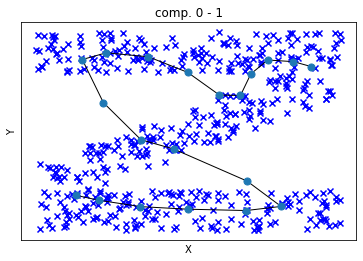

Epoch : 7 qErr : 0.1820  tErr : 0.0520


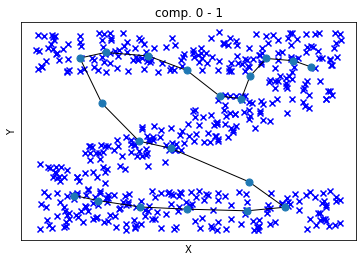

Epoch : 8 qErr : 0.1775  tErr : 0.0640


Epoch : 9 qErr : 0.1737  tErr : 0.0700


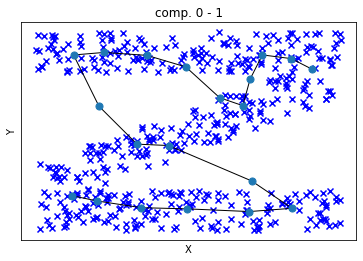

Epoch : 10 qErr : 0.1697  tErr : 0.0780


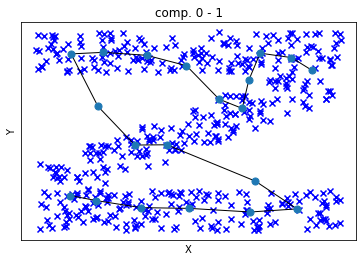

Epoch : 11 qErr : 0.1656  tErr : 0.0700


Epoch : 12 qErr : 0.1623  tErr : 0.0800


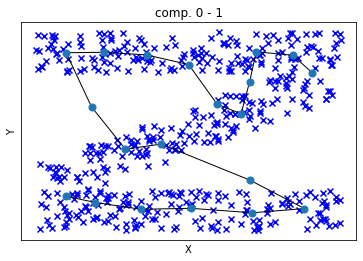

Epoch : 13 qErr : 0.1584  tErr : 0.1060


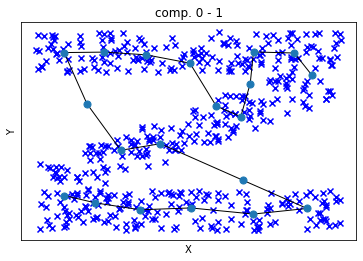

Epoch : 14 qErr : 0.1550  tErr : 0.1280


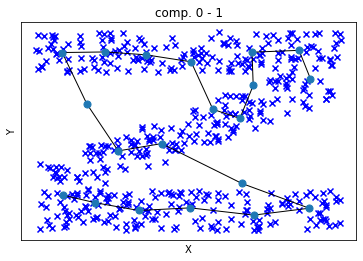

Epoch : 15 qErr : 0.1516  tErr : 0.1520


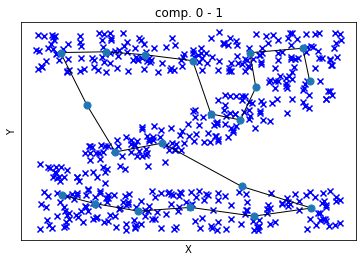

Epoch : 16 qErr : 0.1479  tErr : 0.1900


Epoch : 17 qErr : 0.1462  tErr : 0.2060


Epoch : 18 qErr : 0.1455  tErr : 0.2120


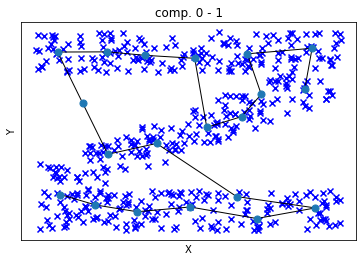

Epoch : 19 qErr : 0.1447  tErr : 0.2200


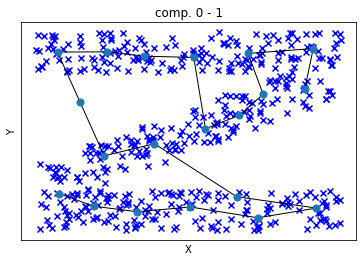

In [17]:
sm.train(n_job=1, 
         verbose=None, 
         train_rough_len=4, 
         train_rough_radiusin=3,
         train_rough_radiusfin=1,
         train_finetune_len=20,
         train_finetune_radiusin=1.25,
         train_finetune_radiusfin=0.2,
         watch_evolution = True)

**Affichage des T-SNE**

In [19]:
#sm.plot_tsne()

#### Affichages graphiques :

 - **Affichage de la carte**

In [20]:
from mapview import View2D
view2D  = View2D(16,16,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;

<Figure size 432x288 with 0 Axes>

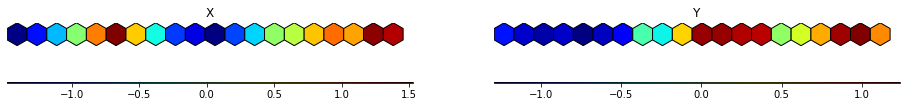

In [21]:
view2D.show(sm, col_sz=2, which_dim="all", denormalize=True) ; 

 - **Affichage de la carte avec etiquettes (les indices des neurones)**

<Figure size 432x288 with 0 Axes>

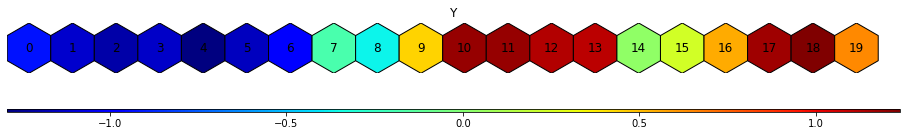

In [22]:
view2D  = View2D(16,10,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;
view2D.show(sm, neuronLabels=None,anotate=True, col_sz=1, which_dim=1, denormalize=True, labelsize=12) ; 

 - **Affichage de la carte avec les cardinalités**

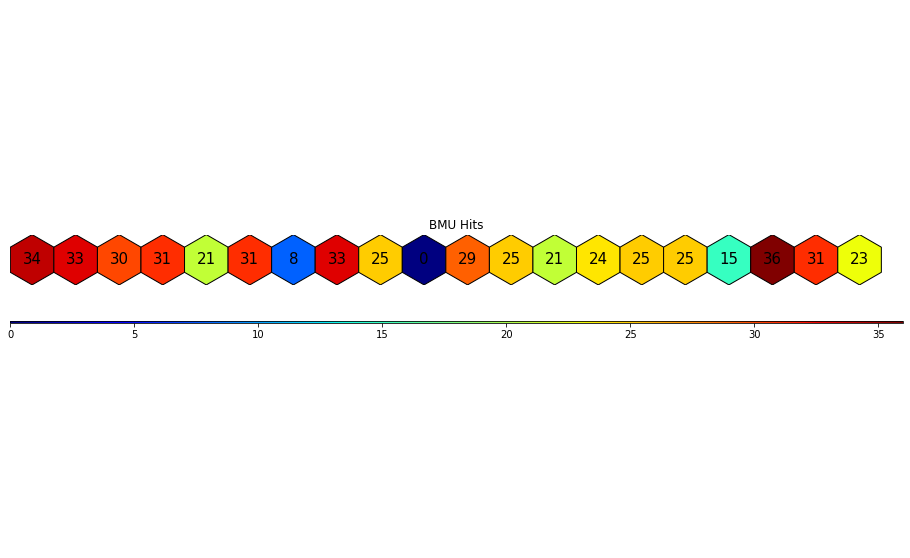

In [23]:
from bmuhits import BmuHitsView
vhts  = BmuHitsView(16,10,"Hits by neuron",text_size=20)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=15, logaritmic=False)

 - **Affichage de la carte (distances entre les référents/neurones)**

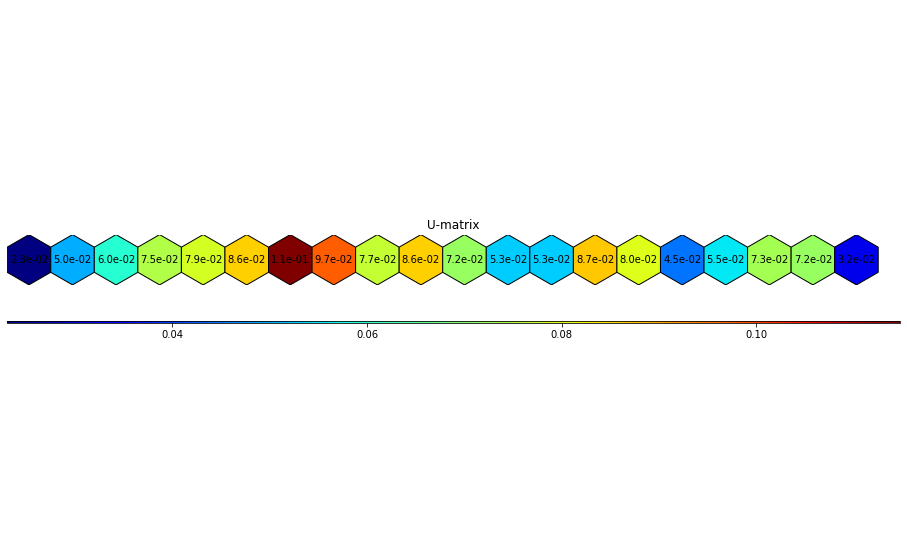

In [31]:
from umatrix import UMatrixView
umat = UMatrixView(16,10,"Unified Distance Matrix", text_size=5)
umat.show(sm) ;

#### Evaluer l'apprentissage de la carte

* **Calcul des erreurs globales**

In [32]:
topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print ("Topographic error  = %s\nQuantization error = %s" % (topographic_error, quantization_error))

Topographic error  = 0.22
Quantization error = 0.14465435607660576


 * **Coefficient de Silhouette**
(Pour cette partie on pourra voir la définition du [coefficient de Silhouette](https://fr.wikipedia.org/wiki/Silhouette_(clustering)) sur wikipedia ainsi que la documentation sur le site de scikit learn pour laquelle il y a un [tutoriel sur kmoyennes et silouhette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html))    
En partitionnement de données (clustering), le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en classification automatique. Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. 

In [33]:
# sm._bmu = sm._bmu[0].astype(int)

In [34]:
silhouette_avg = silhouette_score(sm._data, sm._bmu[0].astype(int))
silhouette_avg

0.37203551960661807

In [35]:
sample_silhouette_values = coefficientSilhouette = silhouette_samples(sData._data, sm._bmu[0].astype(int))
# sample_silhouette_values

#### Labellisation des neurones référents à partir des labels des données

In [36]:
sm.node_labels_from_data(sData)

In [37]:
neuron_labels = np.array(sm.node_labels)
print(neuron_labels)

['D' 'B' 'B' 'B' 'B' 'B' 'B' 'D' 'D' 'Nan' 'T' 'T' 'T' 'T' 'D' 'D' 'D' 'T'
 'T' 'D']


 - **Affichage de la carte avec etiquettes (les votes)**

In [38]:
#view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=4, which_dim=0, denormalize=True)

<Figure size 432x288 with 0 Axes>

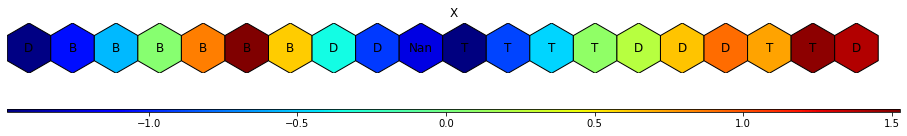

In [39]:
view2D  = View2D(16,10,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=1, which_dim=0, denormalize=True,labelsize=12) ; 

In [43]:
#view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=2, which_dim=1, denormalize=True)

<Figure size 432x288 with 0 Axes>

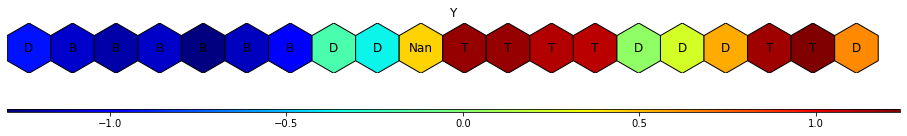

In [44]:
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=1, which_dim=1, denormalize=True,labelsize=12) ; 

In [45]:
#view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=4, which_dim="all", denormalize=True)

<Figure size 432x288 with 0 Axes>

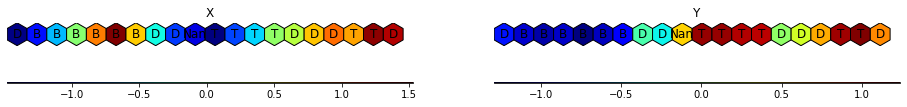

In [46]:
view2D  = View2D(16,16,
                 "lettre "+strChoixDeLaForme,
                 text_size=10)
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=2, which_dim="all", denormalize=True, labelsize=12) ;

#### Classification Ascendante Hiérarchique

 - **Affichage du dendrogramme des référents**

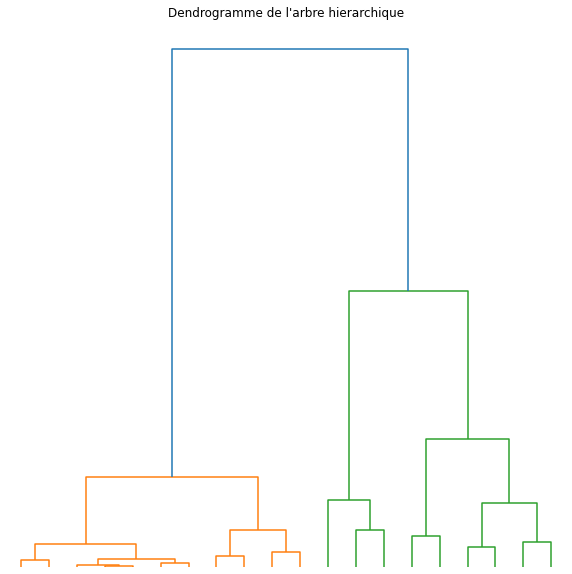

In [47]:
from dendrogram import DendrogramView
dendrogram = DendrogramView(10,10,
                            "Dendrogramme de l'arbre hierarchique",
                            text_size = 10)
dendrogram.show(sm) ; 

 - **Affichage de la carte (classes de la CAH)**

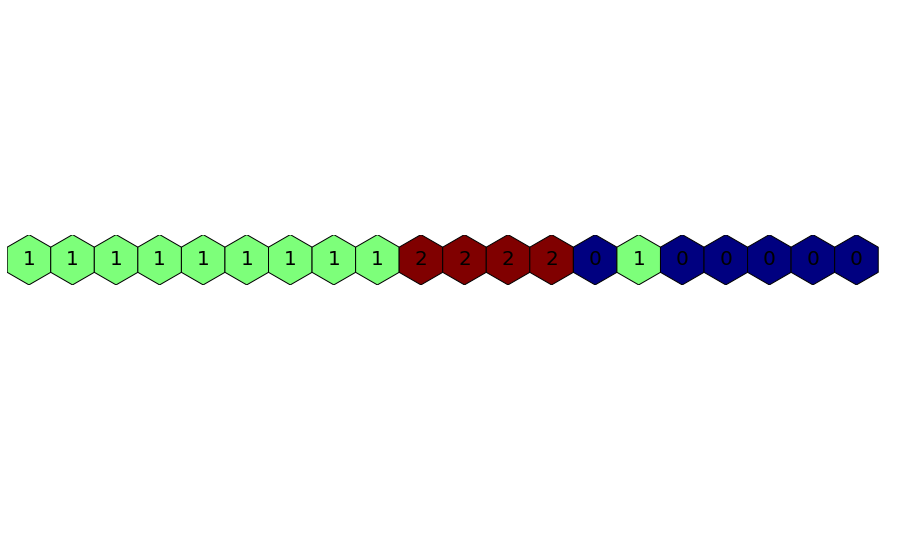

In [49]:
from hitmap import HitMapView
sm.cluster(3)
hits  = HitMapView(16,10,"Clustering",text_size=20)
a=hits.show(sm,labelsize=20)

#### Un peu de supervisé (pas toujours possible)
Comme les données sont associées à des classes, nous allons en profiter pour voir la correspondance entre les classes issues de la carte (déduites uniquement des entrées de la carte) et celles fournies avec les données.    
**On rappelle qu'il s'agit d'un algorithme non supervisé.**    
Ainsi, on ne prend pas en compte les classes lors de l'apprentissage.    
**On cherche donc à évaluer la capacité de la carte à discriminer ces classes. Cela ne pourra être fait que si les données des différentes classes sont bien distinctes dans l'espace des données (i.e. les entrées de la carte).** 

**Détermination des indices des classes estimées et désirées**

On ajoute la classe de rejet

In [50]:
classnames_ = classnames
classnames_.append('Nan')
classnames_ = np.array(classnames_)
classnames_

array(['T', 'B', 'D', 'Nan'], dtype='<U3')

Détermination des indices des classes désirées

In [51]:
_, classes_desirees = np.where(data_labels[:,None]==np.array(classnames)[None,:])
#classes_desirees

Par précaution, on recalcule les etiquettes des neurones

In [52]:
# calcul des BMU (au cas où)
sm._bmu=sm.find_bmu(sm._data) 
# camcul des etiquettes pour les neurones (votes)
sm.node_labels_from_data(sData)
# récupération des etiquetes
neuron_labels = np.array(sm.node_labels)

Détermination des indices des classes estimées

In [53]:
# classes esimees
data_labels_estim = neuron_labels[sm._bmu[0].astype(int)]
_, classes_estimees = np.where(data_labels_estim[:,None]==np.array(classnames)[None,:])
#classes_estimees

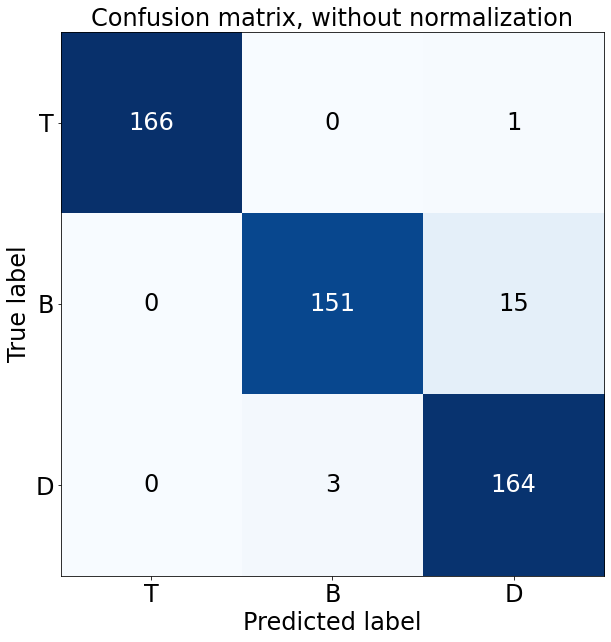

In [54]:
plt.figure(figsize=(10,10)) 
plot_confusion_matrix(classes_desirees, classes_estimees, classnames_,
                          title='',fontsize=24) ;